In [1]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**1. Import the Necessary Libraries**

In [2]:
import warnings
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

**2. 1R Classification**

In [3]:
# Display the training data:
df_train = pd.read_csv("Assignment 1_Train.csv")
df_train

,Status,Gender,Attr3,Class
0,Married,Male,0,High
1,Single,Female,1,Low
2,Married,Female,1,Medium
3,Divorced,Female,0,High
4,Single,Male,1,Low
5,Single,Male,1,Low
6,Divorced,Female,1,Medium
7,Single,Female,1,Medium
8,Married,Male,1,High
9,Divorced,Male,0,High


In [4]:
# Display the testing data:
df_test = pd.read_csv("Assignment 1_Test.csv")
df_test

,Status,Gender,Attr3,Class
0,Single,Male,0,High
1,Married,Female,0,Low
2,Married,Female,1,Medium
3,Divorced,Male,0,High
4,Single,Female,1,Medium


In [5]:
# Find the classification rule for 1R when the "Status" is selected as the feature to focus on:
status_1R_classifications = {}
for status in df_train["Status"].unique():
    status_1R_classifications[status] = df_train[df_train["Status"]==status]["Class"].value_counts().index[0]
status_1R_classifications

{'Married': 'High', 'Single': 'Low', 'Divorced': 'High'}

In [6]:
# Find the error count for the selected feature "Status":
status_1R_error = 0
for status in status_1R_classifications:
    df_temp = df_train[df_train["Status"] == status]
    status_1R_error += len(df_temp[df_temp["Class"]!=status_1R_classifications[status]])
del(df_temp)
status_1R_error

7

In [7]:
# Find the classification rule for 1R when the "Gender" is selected as the feature to focus on:
gender_1R_classifications = {}
for gender in df_train["Gender"].unique():
    gender_1R_classifications[gender] = df_train[df_train["Gender"]==gender]["Class"].value_counts().index[0]
gender_1R_classifications

{'Male': 'Low', 'Female': 'Medium'}

In [8]:
# Find the error count for the selected feature "Gender":
gender_1R_error = 0
for gender in gender_1R_classifications:
    df_temp = df_train[df_train["Gender"] == gender]
    gender_1R_error += len(df_temp[df_temp["Class"]!=gender_1R_classifications[gender]])
del(df_temp)
gender_1R_error

10

In [9]:
# Find the classification rule for 1R when the "Attr3" is selected as the feature to focus on:
attr3_1R_classifications = {}
for attr3 in df_train["Attr3"].unique():
    attr3_1R_classifications[attr3] = df_train[df_train["Attr3"]==attr3]["Class"].value_counts().index[0]
attr3_1R_classifications

{0: 'High', 1: 'Low'}

In [10]:
# Find the error count for the selected feature "Attr3":
attr3_1R_error = 0
for attr3 in attr3_1R_classifications:
    df_temp = df_train[df_train["Attr3"] == attr3]
    attr3_1R_error += len(df_temp[df_temp["Class"]!=attr3_1R_classifications[attr3]])
del(df_temp)
attr3_1R_error

11

In [11]:
# Report the findings:
print("Error number for the feature Status:", str(status_1R_error))
print("Error number for the feature Gender:", str(gender_1R_error))
print("Error number for the feature Attr3:", str(attr3_1R_error))

Error number for the feature Status: 7
Error number for the feature Gender: 10
Error number for the feature Attr3: 11


Hence, focusing on the results, the feature "Status" is selected as the feature to perform 1R.
Below, you may find the 1R classifications:

In [12]:
# The column "1R_Classes" is temporarily added to the test dataframe for analysis:
classifications_1R = []
for row, column in df_test.iterrows():
    status = column.iloc[0]
    classifications_1R.append(status_1R_classifications[status])
df_temp = df_test.copy()
df_temp["1R_Classes"] = classifications_1R
display(df_temp)

,Status,Gender,Attr3,Class,1R_Classes
0,Single,Male,0,High,Low
1,Married,Female,0,Low,High
2,Married,Female,1,Medium,High
3,Divorced,Male,0,High,High
4,Single,Female,1,Medium,Low


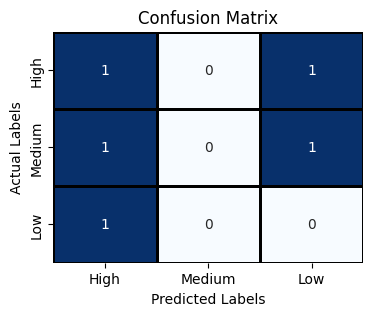

In [13]:
# Confusion Matrix:
actual = df_temp['Class']
predicted = df_temp['1R_Classes']
del(df_temp)
conf_matrix = confusion_matrix(actual, predicted, labels=['High', 'Medium', 'Low'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['High', 'Medium', 'Low'], columns=['High', 'Medium', 'Low'])
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1,
            linecolor="black")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [14]:
conf_matrix_df

,High,Medium,Low
High,1,0,1
Medium,1,0,1
Low,1,0,0


In [15]:
# Accuracy (by default, micro):
accuracy = accuracy_score(actual, predicted)
print("Micro-Accuracy:", accuracy)

# Error Rate:
print("Error Rate:", 1-accuracy)

# Precision (calculated for each class and macro averaged):
precision = precision_score(actual, predicted, average='macro')
print("Macro Precision: {prec:.2f}".format(prec=precision))

# True Positive Rate (Sensitivity/Recall)
sensitivity = recall_score(actual, predicted, average='macro')
print("Macro Sensitivity/Recall/TPR: {sens:.2f}".format(sens=sensitivity))

# Negative Predictive Value (NPV):
tn_high = conf_matrix_df.loc["Medium"]["Medium"] + conf_matrix_df.loc["Medium"]["Low"] + conf_matrix_df.loc["Low"]["Medium"] + conf_matrix_df.loc["Low"]["Low"]
fn_high = conf_matrix_df.loc["High"]["Medium"] + conf_matrix_df.loc["High"]["Low"]
NPV_High = tn_high / (tn_high + fn_high)

tn_medium = conf_matrix_df.loc["High"]["High"] + conf_matrix_df.loc["High"]["Low"] + conf_matrix_df.loc["Low"]["High"] + conf_matrix_df.loc["Low"]["Low"]
fn_medium = conf_matrix_df.loc["Medium"]["High"] + conf_matrix_df.loc["Medium"]["Low"]
NPV_Medium = tn_medium / (tn_medium + fn_medium)

tn_low = conf_matrix_df.loc["High"]["High"] + conf_matrix_df.loc["High"]["Medium"] + conf_matrix_df.loc["Medium"]["High"] + conf_matrix_df.loc["Medium"]["Medium"]
fn_low = conf_matrix_df.loc["Low"]["High"] + conf_matrix_df.loc["Low"]["Medium"]
NPV_Low = tn_low/(tn_low + fn_low)

print("Macro NPV:", "{NPV:.2f}".format(NPV = (NPV_High+NPV_Medium+NPV_Low)/3))

# True Negative Rate (Specificity)
tn_high = conf_matrix_df.loc["Medium"]["Medium"] + conf_matrix_df.loc["Medium"]["Low"] + conf_matrix_df.loc["Low"]["Medium"] + conf_matrix_df.loc["Low"]["Low"]
fp_high = conf_matrix_df.loc["Medium"]["High"] + conf_matrix_df.loc["Low"]["High"]
TNR_High = tn_high / (tn_high + fp_high)

tn_medium = conf_matrix_df.loc["High"]["High"] + conf_matrix_df.loc["High"]["Low"] + conf_matrix_df.loc["Low"]["High"] + conf_matrix_df.loc["Low"]["Low"]
fp_medium = conf_matrix_df.loc["High"]["Medium"] + conf_matrix_df.loc["Low"]["Medium"]
TNR_Medium = tn_medium / (tn_medium + fp_medium)

tn_low = conf_matrix_df.loc["High"]["High"] + conf_matrix_df.loc["High"]["Medium"] + conf_matrix_df.loc["Medium"]["High"] + conf_matrix_df.loc["Medium"]["Medium"]
fp_low = conf_matrix_df.loc["High"]["Low"] + conf_matrix_df.loc["Medium"]["Low"]
TNR_Low = tn_low / (tn_low + fp_low)

print("Macro TNR/Specifity: {spec:.2f}".format(spec=(TNR_High + TNR_Medium + TNR_Low)/3))

# False Positive Rate (FPR)
FPR_High = 1-TNR_High
FPR_Medium = 1 - TNR_Medium
FPR_Low = 1 - TNR_Low

print("Macro FPR: {spec:.2f}".format(spec=(FPR_High + FPR_Medium + FPR_Low)/3))

# F-Score
f1 = f1_score(actual, predicted, average='macro')
print("Macro F1-Score: {f:.2f}".format(f=f1))

Micro-Accuracy: 0.2
Error Rate: 0.8
Macro Precision: 0.11
Macro Sensitivity/Recall/TPR: 0.17
Macro NPV: 0.59
Macro TNR/Specifity: 0.61
Macro FPR: 0.39
Macro F1-Score: 0.13


**3. Naive Bayes Classifications**

In [16]:
df_train

,Status,Gender,Attr3,Class
0,Married,Male,0,High
1,Single,Female,1,Low
2,Married,Female,1,Medium
3,Divorced,Female,0,High
4,Single,Male,1,Low
5,Single,Male,1,Low
6,Divorced,Female,1,Medium
7,Single,Female,1,Medium
8,Married,Male,1,High
9,Divorced,Male,0,High


In [17]:
df_test

,Status,Gender,Attr3,Class
0,Single,Male,0,High
1,Married,Female,0,Low
2,Married,Female,1,Medium
3,Divorced,Male,0,High
4,Single,Female,1,Medium


In [18]:
# Initial Probabilities:
P_High   = len(df_train[df_train["Class"] == "High"]) / len(df_train["Class"])
P_Medium = len(df_train[df_train["Class"] == "Medium"]) / len(df_train["Class"])
P_Low = len(df_train[df_train["Class"] == "Low"]) / len(df_train["Class"])
print("P(High) =", P_High)
print("P(Medium) =", P_Medium)
print("P(Low) =", P_Low)

P(High) = 0.3333333333333333
P(Medium) = 0.3333333333333333
P(Low) = 0.3333333333333333


In [19]:
# Naive Bayes Table for Status (With Laplace Correction):
P_dict_Status = {"High":[], "Medium":[], "Low":[]}
statuses = df_train["Status"].unique()
for status in statuses:
    P_dict_Status["High"].append(len(df_train[(df_train["Status"]==status) & (df_train["Class"]=="High")]) + 1)
    P_dict_Status["Medium"].append(len(df_train[(df_train["Status"]==status) & (df_train["Class"]=="Medium")]) + 1)
    P_dict_Status["Low"].append(len(df_train[(df_train["Status"]==status) & (df_train["Class"]=="Low")]) + 1)
P_dict_Status = pd.DataFrame(P_dict_Status, index=statuses)
P_dict_Status

,High,Medium,Low
Married,5,2,1
Single,1,4,6
Divorced,3,3,2


In [20]:
# Naive Bayes Table for Gender (With Laplace Correction):
P_dict_Gender = {"High":[], "Medium":[], "Low":[]}
genders = df_train["Gender"].unique()
for gender in genders:
    P_dict_Gender["High"].append(len(df_train[(df_train["Gender"]==gender) & (df_train["Class"]=="High")]) + 1)
    P_dict_Gender["Medium"].append(len(df_train[(df_train["Gender"]==gender) & (df_train["Class"]=="Medium")]) + 1)
    P_dict_Gender["Low"].append(len(df_train[(df_train["Gender"]==gender) & (df_train["Class"]=="Low")]) + 1)
P_dict_Gender = pd.DataFrame(P_dict_Gender, index=genders)
P_dict_Gender

,High,Medium,Low
Male,4,3,5
Female,4,5,3


In [21]:
# Naive Bayes Table for Attr3 (With Laplace Correction):
P_dict_Attr3 = {"High":[], "Medium":[], "Low":[]}
Attr3s = df_train["Attr3"].unique()
for Attr3 in Attr3s:
    P_dict_Attr3["High"].append(len(df_train[(df_train["Attr3"]==Attr3) & (df_train["Class"]=="High")]) + 1)
    P_dict_Attr3["Medium"].append(len(df_train[(df_train["Attr3"]==Attr3) & (df_train["Class"]=="Medium")]) + 1)
    P_dict_Attr3["Low"].append(len(df_train[(df_train["Attr3"]==Attr3) & (df_train["Class"]=="Low")]) + 1)
P_dict_Attr3 = pd.DataFrame(P_dict_Attr3, index=Attr3s)
P_dict_Attr3

,High,Medium,Low
0,4,3,3
1,4,5,5


In [22]:
# Classifying the test data:
df_temp = df_test.copy()
nb_classes = []
for row, column in df_test.iterrows():
    status = column[0]
    gender = column[1]
    attr3  = column[2]
    probs_of_classes = {}
    # Probability of being classified as "High":
    for class_ in ["High", "Medium", "Low"]:
        P_status_given_class = P_dict_Status.loc[status][class_] / sum(P_dict_Status[class_])
        P_gender_given_class = P_dict_Gender.loc[gender][class_] / sum(P_dict_Gender[class_])
        P_attr3_given_class  = P_dict_Attr3.loc[attr3][class_] / sum(P_dict_Attr3[class_])
        result = P_status_given_class * P_gender_given_class * P_attr3_given_class * 0.333 # I wrote 0.333 since all classes have equal probabilities of 1/3.
        print("P(" + status + ", " + gender + ", " + str(attr3) + " | " + class_ + ") x P(" + class_+ ") = " "{ans:.4f}".format(ans=result))
        probs_of_classes[class_] = result
    probs_of_classes = dict(sorted(probs_of_classes.items(), key=lambda item: item[1], reverse=True))
    nb_classes.append(list(probs_of_classes.items())[0][0])
df_temp["NB_Class"] = nb_classes

P(Single, Male, 0 | High) x P(High) = 0.0092
P(Single, Male, 0 | Medium) x P(Medium) = 0.0208
P(Single, Male, 0 | Low) x P(Low) = 0.0520
P(Married, Female, 0 | High) x P(High) = 0.0463
P(Married, Female, 0 | Medium) x P(Medium) = 0.0173
P(Married, Female, 0 | Low) x P(Low) = 0.0052
P(Married, Female, 1 | High) x P(High) = 0.0463
P(Married, Female, 1 | Medium) x P(Medium) = 0.0289
P(Married, Female, 1 | Low) x P(Low) = 0.0087
P(Divorced, Male, 0 | High) x P(High) = 0.0278
P(Divorced, Male, 0 | Medium) x P(Medium) = 0.0156
P(Divorced, Male, 0 | Low) x P(Low) = 0.0173
P(Single, Female, 1 | High) x P(High) = 0.0092
P(Single, Female, 1 | Medium) x P(Medium) = 0.0578
P(Single, Female, 1 | Low) x P(Low) = 0.0520


In [23]:
# Result of the test classifications:
df_temp

,Status,Gender,Attr3,Class,NB_Class
0,Single,Male,0,High,Low
1,Married,Female,0,Low,High
2,Married,Female,1,Medium,High
3,Divorced,Male,0,High,High
4,Single,Female,1,Medium,Medium


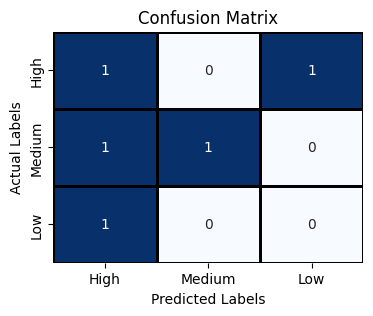

In [24]:
# Confusion Matrix:
actual = df_temp['Class']
predicted = df_temp['NB_Class']
del(df_temp)
conf_matrix = confusion_matrix(actual, predicted, labels=['High', 'Medium', 'Low'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['High', 'Medium', 'Low'], columns=['High', 'Medium', 'Low'])
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1,
            linecolor="black")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [25]:
# Accuracy (by default, micro):
accuracy = accuracy_score(actual, predicted)
print("Micro-Accuracy:", accuracy)

# Error Rate:
print("Error Rate:", 1-accuracy)

# Precision (calculated for each class and macro averaged):
precision = precision_score(actual, predicted, average='macro')
print("Macro Precision: {prec:.2f}".format(prec=precision))

# True Positive Rate (Sensitivity/Recall)
sensitivity = recall_score(actual, predicted, average='macro')
print("Macro Sensitivity/Recall/TPR: {sens:.2f}".format(sens=sensitivity))

# Negative Predictive Value (NPV):
tn_high = conf_matrix_df.loc["Medium"]["Medium"] + conf_matrix_df.loc["Medium"]["Low"] + conf_matrix_df.loc["Low"]["Medium"] + conf_matrix_df.loc["Low"]["Low"]
fn_high = conf_matrix_df.loc["High"]["Medium"] + conf_matrix_df.loc["High"]["Low"]
NPV_High = tn_high / (tn_high + fn_high)

tn_medium = conf_matrix_df.loc["High"]["High"] + conf_matrix_df.loc["High"]["Low"] + conf_matrix_df.loc["Low"]["High"] + conf_matrix_df.loc["Low"]["Low"]
fn_medium = conf_matrix_df.loc["Medium"]["High"] + conf_matrix_df.loc["Medium"]["Low"]
NPV_Medium = tn_medium / (tn_medium + fn_medium)

tn_low = conf_matrix_df.loc["High"]["High"] + conf_matrix_df.loc["High"]["Medium"] + conf_matrix_df.loc["Medium"]["High"] + conf_matrix_df.loc["Medium"]["Medium"]
fn_low = conf_matrix_df.loc["Low"]["High"] + conf_matrix_df.loc["Low"]["Medium"]
NPV_Low = tn_low/(tn_low + fn_low)

print("Macro NPV:", "{NPV:.2f}".format(NPV = (NPV_High+NPV_Medium+NPV_Low)/3))

# True Negative Rate (Specificity)
tn_high = conf_matrix_df.loc["Medium"]["Medium"] + conf_matrix_df.loc["Medium"]["Low"] + conf_matrix_df.loc["Low"]["Medium"] + conf_matrix_df.loc["Low"]["Low"]
fp_high = conf_matrix_df.loc["Medium"]["High"] + conf_matrix_df.loc["Low"]["High"]
TNR_High = tn_high / (tn_high + fp_high)

tn_medium = conf_matrix_df.loc["High"]["High"] + conf_matrix_df.loc["High"]["Low"] + conf_matrix_df.loc["Low"]["High"] + conf_matrix_df.loc["Low"]["Low"]
fp_medium = conf_matrix_df.loc["High"]["Medium"] + conf_matrix_df.loc["Low"]["Medium"]
TNR_Medium = tn_medium / (tn_medium + fp_medium)

tn_low = conf_matrix_df.loc["High"]["High"] + conf_matrix_df.loc["High"]["Medium"] + conf_matrix_df.loc["Medium"]["High"] + conf_matrix_df.loc["Medium"]["Medium"]
fp_low = conf_matrix_df.loc["High"]["Low"] + conf_matrix_df.loc["Medium"]["Low"]
TNR_Low = tn_low / (tn_low + fp_low)

print("Macro TNR/Specifity: {spec:.2f}".format(spec=(TNR_High + TNR_Medium + TNR_Low)/3))

# False Positive Rate (FPR)
FPR_High = 1-TNR_High
FPR_Medium = 1 - TNR_Medium
FPR_Low = 1 - TNR_Low

print("Macro FPR: {spec:.2f}".format(spec=(FPR_High + FPR_Medium + FPR_Low)/3))

# F-Score
f1 = f1_score(actual, predicted, average='macro')
print("Macro F1-Score: {f:.2f}".format(f=f1))

Micro-Accuracy: 0.4
Error Rate: 0.6
Macro Precision: 0.44
Macro Sensitivity/Recall/TPR: 0.33
Macro NPV: 0.67
Macro TNR/Specifity: 0.69
Macro FPR: 0.31
Macro F1-Score: 0.36


**4. Decision Trees**

['Divorced' 'Married' 'Single']
['Female' 'Male']
['High' 'Low' 'Medium']


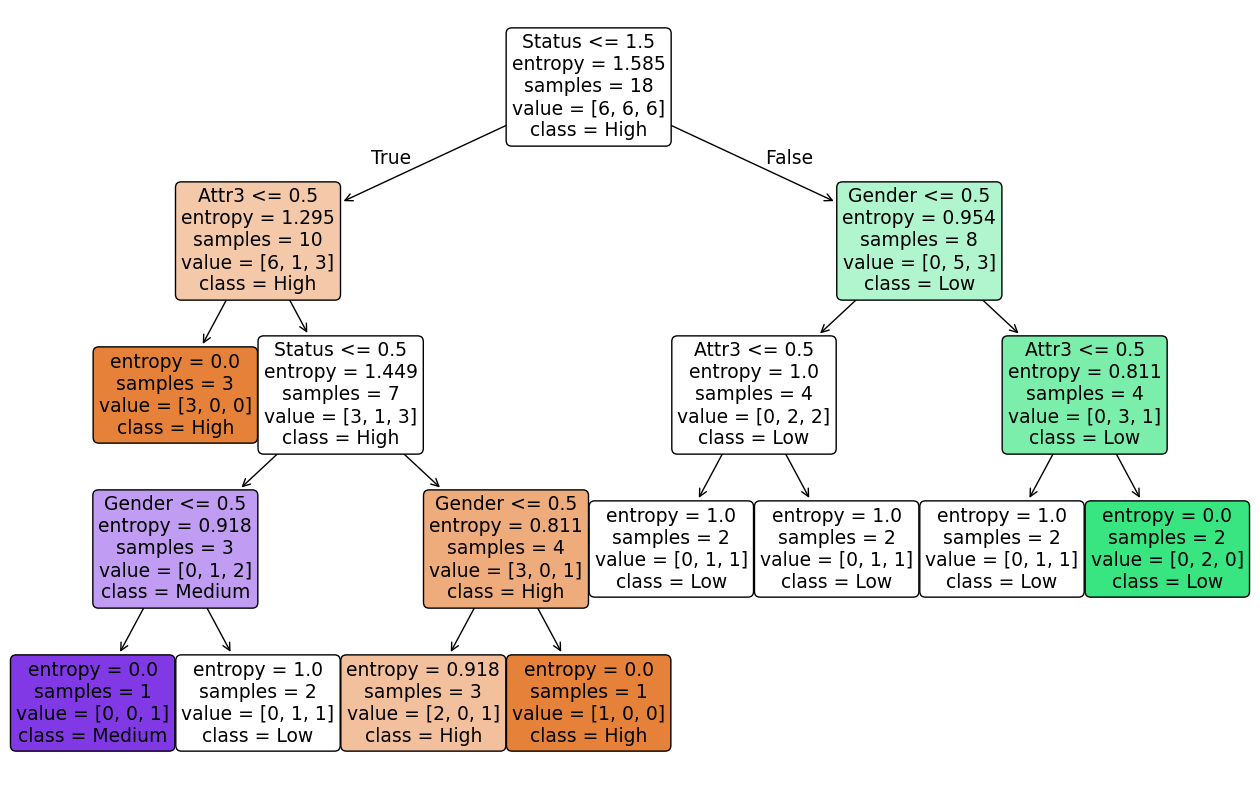

In [26]:
df = df_train.copy()

# Encoding categorical variables:
label_encoders = {}
for column in ['Status', 'Gender', 'Class']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    print(label_encoders[column].classes_)

# Splitting data into features and target:
X = df[['Status', 'Gender', 'Attr3']]
y = df['Class']

# Creating Decision Tree model without pruning:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2)
tree_clf.fit(X, y)

# Plotting the tree:
plt.figure(figsize=(16, 10))
plot_tree(tree_clf, feature_names=['Status', 'Gender', 'Attr3'], class_names=label_encoders['Class'].classes_, filled=True, rounded=True)
plt.show()
del(df)

In [27]:
df_test_encoded = df_test.copy()

# Apply the same encoding to the test data:
for column in ['Status', 'Gender', 'Class']:
    if column in label_encoders:
        df_test_encoded[column] = label_encoders[column].transform(df_test[column])

# Prepare test features and target:
X_test = df_test_encoded[['Status', 'Gender', 'Attr3']]
y_test = df_test_encoded['Class']

# Predict using the trained model:
y_pred = tree_clf.predict(X_test)

# Add predictions to a copy of the original test data:
df_temp = df_test.copy()
df_temp['DT_Class'] = label_encoders['Class'].inverse_transform(y_pred)

# Display the results:
display(df_temp)
del(df_test_encoded)

,Status,Gender,Attr3,Class,DT_Class
0,Single,Male,0,High,Low
1,Married,Female,0,Low,High
2,Married,Female,1,Medium,High
3,Divorced,Male,0,High,High
4,Single,Female,1,Medium,Low


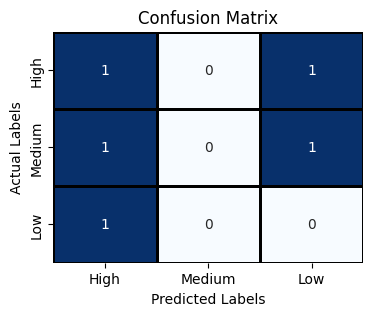

In [28]:
# Confusion Matrix:
actual = df_temp['Class']
predicted = df_temp['DT_Class']
del(df_temp)
conf_matrix = confusion_matrix(actual, predicted, labels=['High', 'Medium', 'Low'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['High', 'Medium', 'Low'], columns=['High', 'Medium', 'Low'])
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1,
            linecolor="black")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [29]:
# Accuracy (by default, micro):
accuracy = accuracy_score(actual, predicted)
print("Micro-Accuracy:", accuracy)

# Error Rate:
print("Error Rate:", 1-accuracy)

# Precision (calculated for each class and macro averaged):
precision = precision_score(actual, predicted, average='macro')
print("Macro Precision: {prec:.2f}".format(prec=precision))

# True Positive Rate (Sensitivity/Recall)
sensitivity = recall_score(actual, predicted, average='macro')
print("Macro Sensitivity/Recall/TPR: {sens:.2f}".format(sens=sensitivity))

# Negative Predictive Value (NPV):
tn_high = conf_matrix_df.loc["Medium"]["Medium"] + conf_matrix_df.loc["Medium"]["Low"] + conf_matrix_df.loc["Low"]["Medium"] + conf_matrix_df.loc["Low"]["Low"]
fn_high = conf_matrix_df.loc["High"]["Medium"] + conf_matrix_df.loc["High"]["Low"]
NPV_High = tn_high / (tn_high + fn_high)

tn_medium = conf_matrix_df.loc["High"]["High"] + conf_matrix_df.loc["High"]["Low"] + conf_matrix_df.loc["Low"]["High"] + conf_matrix_df.loc["Low"]["Low"]
fn_medium = conf_matrix_df.loc["Medium"]["High"] + conf_matrix_df.loc["Medium"]["Low"]
NPV_Medium = tn_medium / (tn_medium + fn_medium)

tn_low = conf_matrix_df.loc["High"]["High"] + conf_matrix_df.loc["High"]["Medium"] + conf_matrix_df.loc["Medium"]["High"] + conf_matrix_df.loc["Medium"]["Medium"]
fn_low = conf_matrix_df.loc["Low"]["High"] + conf_matrix_df.loc["Low"]["Medium"]
NPV_Low = tn_low/(tn_low + fn_low)

print("Macro NPV:", "{NPV:.2f}".format(NPV = (NPV_High+NPV_Medium+NPV_Low)/3))

# True Negative Rate (Specificity)
tn_high = conf_matrix_df.loc["Medium"]["Medium"] + conf_matrix_df.loc["Medium"]["Low"] + conf_matrix_df.loc["Low"]["Medium"] + conf_matrix_df.loc["Low"]["Low"]
fp_high = conf_matrix_df.loc["Medium"]["High"] + conf_matrix_df.loc["Low"]["High"]
TNR_High = tn_high / (tn_high + fp_high)

tn_medium = conf_matrix_df.loc["High"]["High"] + conf_matrix_df.loc["High"]["Low"] + conf_matrix_df.loc["Low"]["High"] + conf_matrix_df.loc["Low"]["Low"]
fp_medium = conf_matrix_df.loc["High"]["Medium"] + conf_matrix_df.loc["Low"]["Medium"]
TNR_Medium = tn_medium / (tn_medium + fp_medium)

tn_low = conf_matrix_df.loc["High"]["High"] + conf_matrix_df.loc["High"]["Medium"] + conf_matrix_df.loc["Medium"]["High"] + conf_matrix_df.loc["Medium"]["Medium"]
fp_low = conf_matrix_df.loc["High"]["Low"] + conf_matrix_df.loc["Medium"]["Low"]
TNR_Low = tn_low / (tn_low + fp_low)

print("Macro TNR/Specifity: {spec:.2f}".format(spec=(TNR_High + TNR_Medium + TNR_Low)/3))

# False Positive Rate (FPR)
FPR_High = 1-TNR_High
FPR_Medium = 1 - TNR_Medium
FPR_Low = 1 - TNR_Low

print("Macro FPR: {spec:.2f}".format(spec=(FPR_High + FPR_Medium + FPR_Low)/3))

# F-Score
f1 = f1_score(actual, predicted, average='macro')
print("Macro F1-Score: {f:.2f}".format(f=f1))

Micro-Accuracy: 0.2
Error Rate: 0.8
Macro Precision: 0.11
Macro Sensitivity/Recall/TPR: 0.17
Macro NPV: 0.59
Macro TNR/Specifity: 0.61
Macro FPR: 0.39
Macro F1-Score: 0.13


**5. kNN with Hamming Distance**

In [30]:
# Below you may find the manual implementation of kNN based on Hamming Distance with Majority Voting:
observation = 1
knn_classes = []
for row, column in df_test.iterrows():   
    neighbors = {"0":[], "1":[], "2":[], "3":[]}
    status = column[0]
    gender = column[1]
    attr3 = column[2]
    for row, column in df_train.iterrows():
        distance = 0
        if column[0] != status:
            distance += 1
        if column[1] != gender:
            distance += 1
        if column[2] != attr3:
            distance += 1
        neighbors[str(distance)].append(column[3])
    print("The neighbors of the data point " + str(observation) + ":")
    print(neighbors)
    print()
    observation += 1
    try:
        knn_classes.append(max(set(neighbors["0"]), key=neighbors["0"].count)) # Majority Voting
    except:
        knn_classes.append(max(set(neighbors["1"]), key=neighbors["1"].count)) # Majority Voting

df_temp = df_test.copy()
df_temp["kNN_Class"] = knn_classes
df_temp


The neighbors of the data point 1:
{'0': ['Low', 'Medium'], '1': ['High', 'Low', 'Low', 'High', 'Medium', 'Low'], '2': ['Low', 'High', 'Medium', 'High', 'Medium', 'Low'], '3': ['Medium', 'Medium', 'High', 'High']}

The neighbors of the data point 2:
{'0': [], '1': ['High', 'Medium', 'High', 'Medium', 'High', 'Low', 'High'], '2': ['Low', 'Medium', 'Medium', 'High', 'High', 'Low', 'Medium'], '3': ['Low', 'Low', 'Medium', 'Low']}

The neighbors of the data point 3:
{'0': ['Medium', 'High', 'High'], '1': ['Low', 'Medium', 'Medium', 'High'], '2': ['High', 'High', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Low'], '3': ['High', 'Low', 'Medium']}

The neighbors of the data point 4:
{'0': ['High'], '1': ['High', 'High', 'Low', 'Medium', 'Medium', 'Low'], '2': ['Low', 'Low', 'Medium', 'High', 'Medium', 'Low'], '3': ['Low', 'Medium', 'Medium', 'High', 'High']}

The neighbors of the data point 5:
{'0': ['Low', 'Medium'], '1': ['Medium', 'Low', 'Low', 'Medium', 'Medium', 'High', 'Low', 'High'], '2':

,Status,Gender,Attr3,Class,kNN_Class
0,Single,Male,0,High,Low
1,Married,Female,0,Low,High
2,Married,Female,1,Medium,High
3,Divorced,Male,0,High,High
4,Single,Female,1,Medium,Low


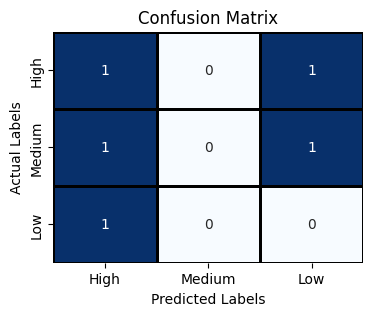

In [31]:
# Confusion Matrix:
actual = df_temp['Class']
predicted = df_temp['kNN_Class']
del(df_temp)
conf_matrix = confusion_matrix(actual, predicted, labels=['High', 'Medium', 'Low'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['High', 'Medium', 'Low'], columns=['High', 'Medium', 'Low'])
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1,
            linecolor="black")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [32]:
# Accuracy (by default, micro):
accuracy = accuracy_score(actual, predicted)
print("Micro-Accuracy:", accuracy)

# Error Rate:
print("Error Rate:", 1-accuracy)

# Precision (calculated for each class and macro averaged):
precision = precision_score(actual, predicted, average='macro')
print("Macro Precision: {prec:.2f}".format(prec=precision))

# True Positive Rate (Sensitivity/Recall)
sensitivity = recall_score(actual, predicted, average='macro')
print("Macro Sensitivity/Recall/TPR: {sens:.2f}".format(sens=sensitivity))

# Negative Predictive Value (NPV):
tn_high = conf_matrix_df.loc["Medium"]["Medium"] + conf_matrix_df.loc["Medium"]["Low"] + conf_matrix_df.loc["Low"]["Medium"] + conf_matrix_df.loc["Low"]["Low"]
fn_high = conf_matrix_df.loc["High"]["Medium"] + conf_matrix_df.loc["High"]["Low"]
NPV_High = tn_high / (tn_high + fn_high)

tn_medium = conf_matrix_df.loc["High"]["High"] + conf_matrix_df.loc["High"]["Low"] + conf_matrix_df.loc["Low"]["High"] + conf_matrix_df.loc["Low"]["Low"]
fn_medium = conf_matrix_df.loc["Medium"]["High"] + conf_matrix_df.loc["Medium"]["Low"]
NPV_Medium = tn_medium / (tn_medium + fn_medium)

tn_low = conf_matrix_df.loc["High"]["High"] + conf_matrix_df.loc["High"]["Medium"] + conf_matrix_df.loc["Medium"]["High"] + conf_matrix_df.loc["Medium"]["Medium"]
fn_low = conf_matrix_df.loc["Low"]["High"] + conf_matrix_df.loc["Low"]["Medium"]
NPV_Low = tn_low/(tn_low + fn_low)

print("Macro NPV:", "{NPV:.2f}".format(NPV = (NPV_High+NPV_Medium+NPV_Low)/3))

# True Negative Rate (Specificity)
tn_high = conf_matrix_df.loc["Medium"]["Medium"] + conf_matrix_df.loc["Medium"]["Low"] + conf_matrix_df.loc["Low"]["Medium"] + conf_matrix_df.loc["Low"]["Low"]
fp_high = conf_matrix_df.loc["Medium"]["High"] + conf_matrix_df.loc["Low"]["High"]
TNR_High = tn_high / (tn_high + fp_high)

tn_medium = conf_matrix_df.loc["High"]["High"] + conf_matrix_df.loc["High"]["Low"] + conf_matrix_df.loc["Low"]["High"] + conf_matrix_df.loc["Low"]["Low"]
fp_medium = conf_matrix_df.loc["High"]["Medium"] + conf_matrix_df.loc["Low"]["Medium"]
TNR_Medium = tn_medium / (tn_medium + fp_medium)

tn_low = conf_matrix_df.loc["High"]["High"] + conf_matrix_df.loc["High"]["Medium"] + conf_matrix_df.loc["Medium"]["High"] + conf_matrix_df.loc["Medium"]["Medium"]
fp_low = conf_matrix_df.loc["High"]["Low"] + conf_matrix_df.loc["Medium"]["Low"]
TNR_Low = tn_low / (tn_low + fp_low)

print("Macro TNR/Specifity: {spec:.2f}".format(spec=(TNR_High + TNR_Medium + TNR_Low)/3))

# False Positive Rate (FPR)
FPR_High = 1-TNR_High
FPR_Medium = 1 - TNR_Medium
FPR_Low = 1 - TNR_Low

print("Macro FPR: {spec:.2f}".format(spec=(FPR_High + FPR_Medium + FPR_Low)/3))

# F-Score
f1 = f1_score(actual, predicted, average='macro')
print("Macro F1-Score: {f:.2f}".format(f=f1))

Micro-Accuracy: 0.2
Error Rate: 0.8
Macro Precision: 0.11
Macro Sensitivity/Recall/TPR: 0.17
Macro NPV: 0.59
Macro TNR/Specifity: 0.61
Macro FPR: 0.39
Macro F1-Score: 0.13
